In [2]:
#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from collections import Counter


In [3]:
train = pd.read_csv('train_set.csv')

In [37]:
train.drop(labels=['Loan ID', 'Customer ID'], axis=1, inplace=True)

# These two features are only for identification.

In [38]:
# # Missing Values

# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [39]:
missing_values_table(train)

# A curious thing about the table below is the last 10 features have the same number o missing values.
# I will go deeper and figure out what is happening.

Your selected dataframe has 17 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
Months since last delinquent,50472,53.1
Credit Score,18222,19.2
Annual Income,18222,19.2
Years in current job,4009,4.2
Bankruptcies,186,0.2
Tax Liens,8,0.0


In [40]:
# Drop the columns with > 50% missing
train.drop(columns = 'Months since last delinquent', axis=1, inplace=True)

In [41]:
# As the number of missing values is so low in the 'Maximum Open Credit' I will drop them.

for i in train['Maximum Open Credit'][train['Maximum Open Credit'].isnull() == True].index:
    train.drop(labels=i, inplace=True)
missing_values_table(train)

Your selected dataframe has 16 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,18222,19.2
Annual Income,18222,19.2
Years in current job,4009,4.2
Bankruptcies,186,0.2
Tax Liens,8,0.0


In [42]:
# As the number of missing values is so low in the 'Tax Liens' I will drop them.

for i in train['Tax Liens'][train['Tax Liens'].isnull() == True].index:
    train.drop(labels=i, inplace=True)
missing_values_table(train)

Your selected dataframe has 16 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,18219,19.2
Annual Income,18219,19.2
Years in current job,4009,4.2
Bankruptcies,178,0.2


In [43]:
# As the number of missing values is so low in the 'Bankruptcies' I will drop them.

for i in train['Bankruptcies'][train['Bankruptcies'].isnull() == True].index:
    train.drop(labels=i, inplace=True)
missing_values_table(train)

Your selected dataframe has 16 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Credit Score,18182,19.2
Annual Income,18182,19.2
Years in current job,4009,4.2


* converting LOAN_STATUS to binary values an renaming it as TARGET

In [44]:
# Map values in 'loan_status' column /target column to numerical
train['TARGET'] = train['Loan Status'].map({
    'Fully Paid': 0, #non- Defaulter
    'Charged Off': 1 # defaulter
})


In [45]:
train = train.drop('Loan Status', axis=1)

some values are missing in credit column .I believe tha these are not missing completely at random.Therefore , I'll make a separate column credit score missing.

In [46]:
train['credit_score_missing'] = train['Credit Score'].isna().astype(int)


In [47]:
# Check average target value when credit score is missing vs not missing
print(train.groupby('credit_score_missing')['TARGET'].mean())


credit_score_missing
0    0.212953
1    0.282807
Name: TARGET, dtype: float64


Most Credit score range form 300 to 850. To impute misisng values i'll use 600 which is neither too low nor too high

In [48]:
train['Credit Score'] = train['Credit Score'].fillna(600)  # A conservative, lower-end score


There are values in credit column which are really high.Like in real life credit score exist between 300-850 . So all values above 800 are clipped to 800.
and below 600 are clipped to 300

In [49]:
train['Credit Score'] = train['Credit Score'].clip(lower=300, upper=850)

<Axes: xlabel='count', ylabel='Years in current job'>

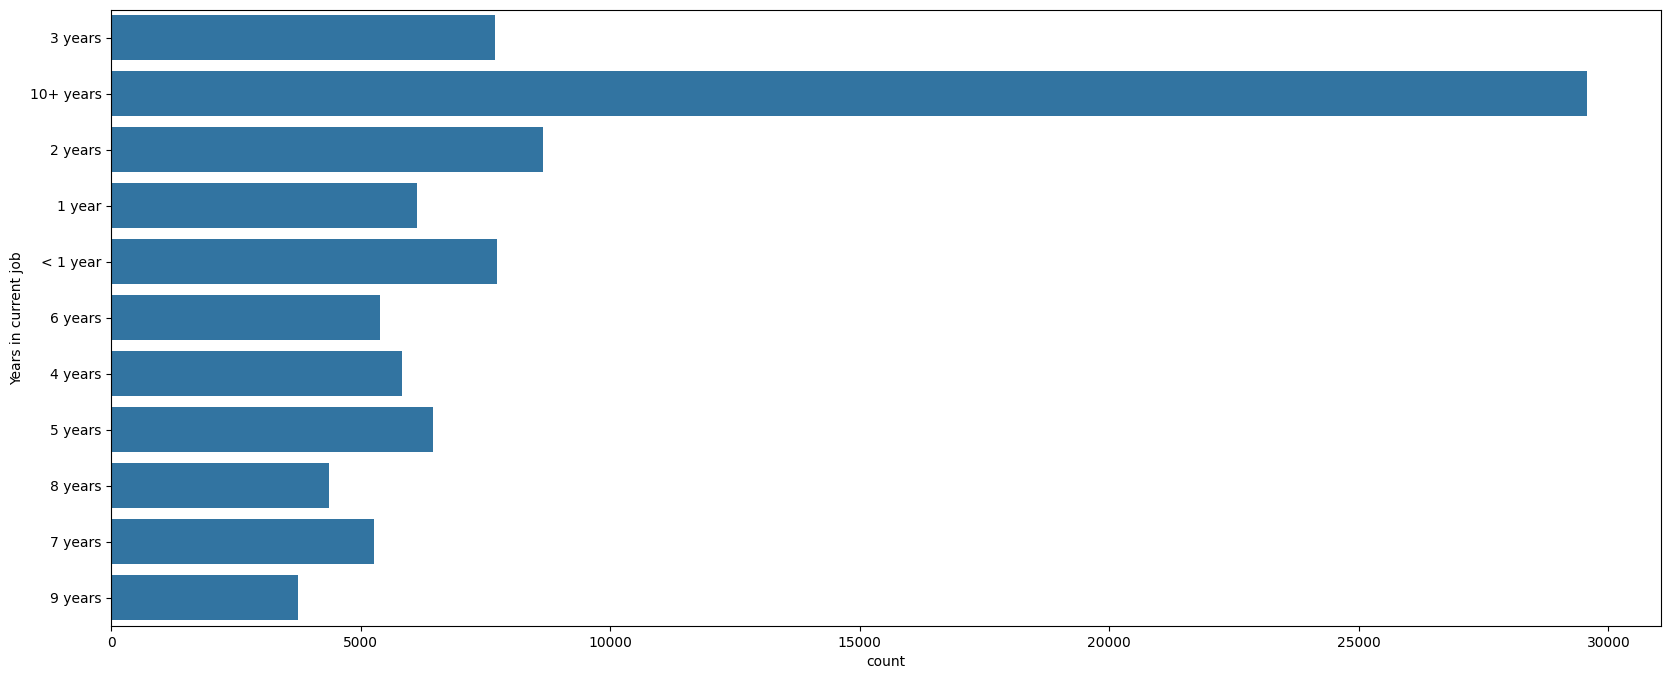

In [50]:
# I will figure out what value is more present in this feature.

plt.figure(figsize=(20,8))

sns.countplot(train['Years in current job'])

# We can see that the value '10+ years' is strongly present in this feature, so I will use this value to fill the
# missing values.

In [51]:
# Calculate the mode of the column
mode_value = train['Years in current job'].mode()[0]

# Fill missing values with the mode
train['Years in current job'].fillna(mode_value, inplace=True)


C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\3358840444.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Years in current job'].fillna(mode_value, inplace=True)


In [52]:
# Calculate the median of Annual Income
median_income = train['Annual Income'].median()

# Fill missing values with the median
train['Annual Income'].fillna(median_income, inplace=True)


C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\855467589.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Annual Income'].fillna(median_income, inplace=True)


In [53]:
missing_values_table(train)

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [54]:
import pandas as pd

# Assume your DataFrame is called 'df'
categorical_columns = train.select_dtypes(include=['object', 'category']).columns
num_categorical = len(categorical_columns)

print(f"Number of categorical features: {num_categorical}")
print("Categorical columns:")
print(categorical_columns.tolist())


Number of categorical features: 4
Categorical columns:
['Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [55]:
# Select only numerical columns
numerical_df = train.select_dtypes(include=['int64','float64'])

# Compute correlation with the target
correlation_with_target = numerical_df.corr(method='pearson')['TARGET'].sort_values(ascending=False)

print("Pearson correlation with TARGET:")
print(correlation_with_target)


Pearson correlation with TARGET:
TARGET                       1.000000
Credit Score                 0.101463
credit_score_missing         0.065718
Number of Open Accounts      0.012138
Tax Liens                    0.011103
Monthly Debt                 0.006176
Number of Credit Problems    0.002170
Bankruptcies                -0.007287
Maximum Open Credit         -0.008415
Current Credit Balance      -0.011888
Years of Credit History     -0.023851
Annual Income               -0.051808
Current Loan Amount         -0.194742
Name: TARGET, dtype: float64


In [56]:
#Font for graph labels, this is used for all graphs in this notebook
label_font = {"fontsize": 12,
              "color" : "darkred",
             'weight': 'normal'}
#Font for graph title, this is used for all graphs in this notebook
title_font = {"fontsize": 15,
              "color" : "darkred",
             'weight': 'normal'}

##### Heatmap

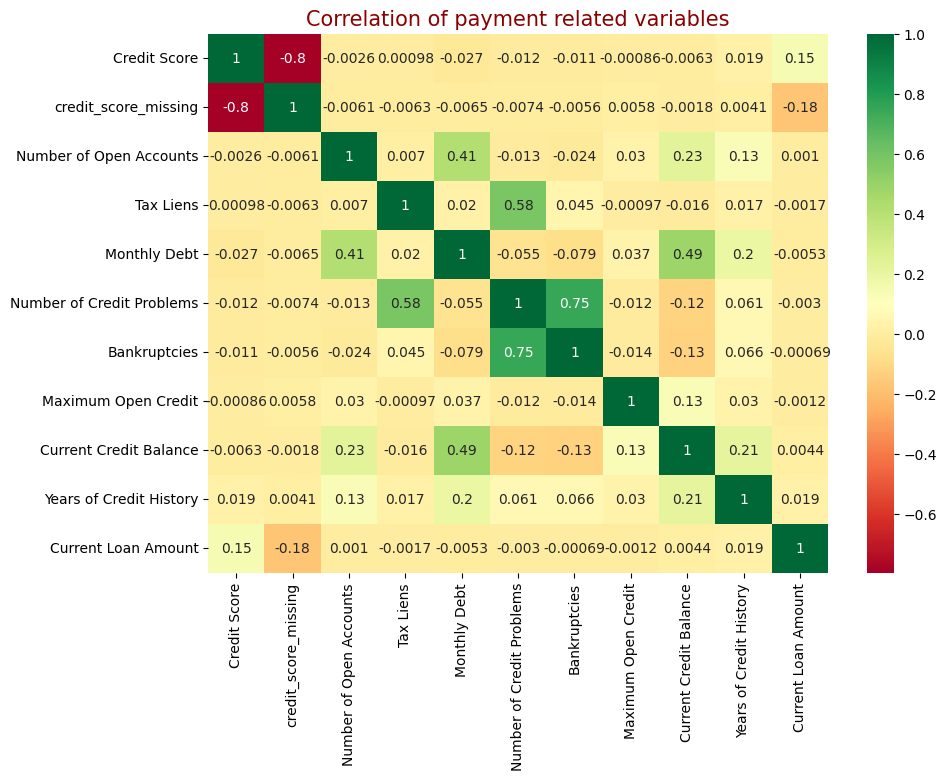

In [57]:
# Mapping the group of payment related variables
tg_amt = train[['Credit Score',
'credit_score_missing',
'Number of Open Accounts',
'Tax Liens',
'Monthly Debt',
'Number of Credit Problems',
'Bankruptcies',
'Maximum Open Credit',
'Current Credit Balance',
'Years of Credit History',
'Current Loan Amount'
       ]].corr()

plt.figure(figsize = (10, 7))
sns.heatmap(tg_amt, annot=True, cmap="RdYlGn")
plt.title('Correlation of payment related variables', title_font)
plt.show()

C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\4058029321.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Term', y='TARGET', data=train, estimator='mean', ci=None, palette='Set2')
C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\4058029321.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Term', y='TARGET', data=train, estimator='mean', ci=None, palette='Set2')


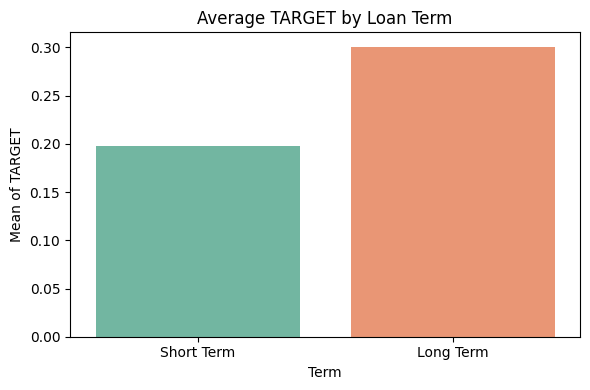

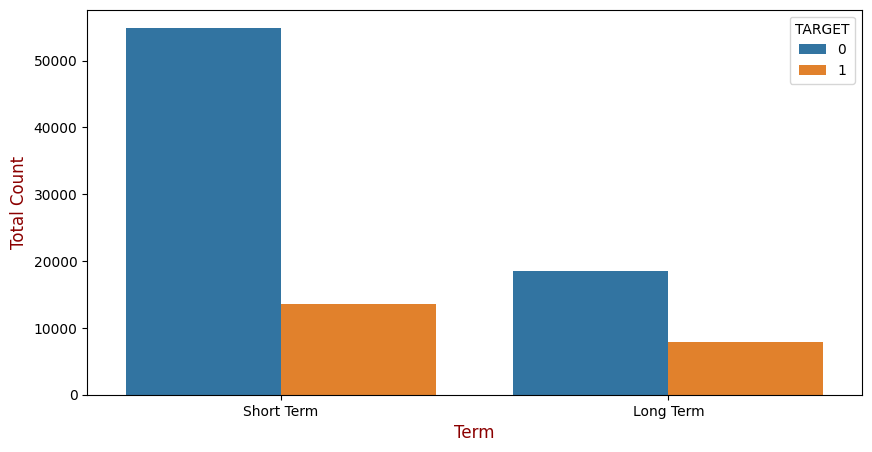

C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\4058029321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Term', y='TARGET', data=train, palette='Set3')


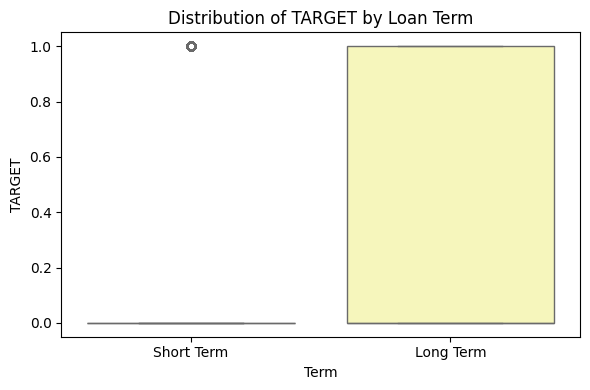

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='Term', y='TARGET', data=train, estimator='mean', ci=None, palette='Set2')
plt.title('Average TARGET by Loan Term')
plt.ylabel('Mean of TARGET')
plt.xlabel('Term')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x = "Term", hue = 'TARGET', data = train)
plt.xlabel("Term", label_font) #Set x axis label
plt.ylabel("Total Count", label_font) #Set y axis label
plt.show()


plt.figure(figsize=(6, 4))
sns.boxplot(x='Term', y='TARGET', data=train, palette='Set3')
plt.title('Distribution of TARGET by Loan Term')
plt.ylabel('TARGET')
plt.xlabel('Term')
plt.tight_layout()
plt.show()



C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\2449626287.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Home Ownership', y='TARGET', data=train, estimator='mean', errorbar=None, palette='Set2')


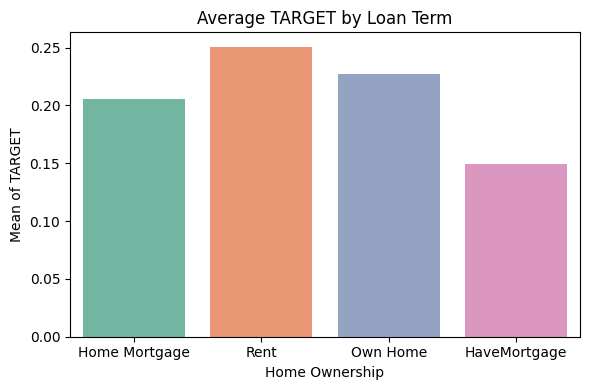

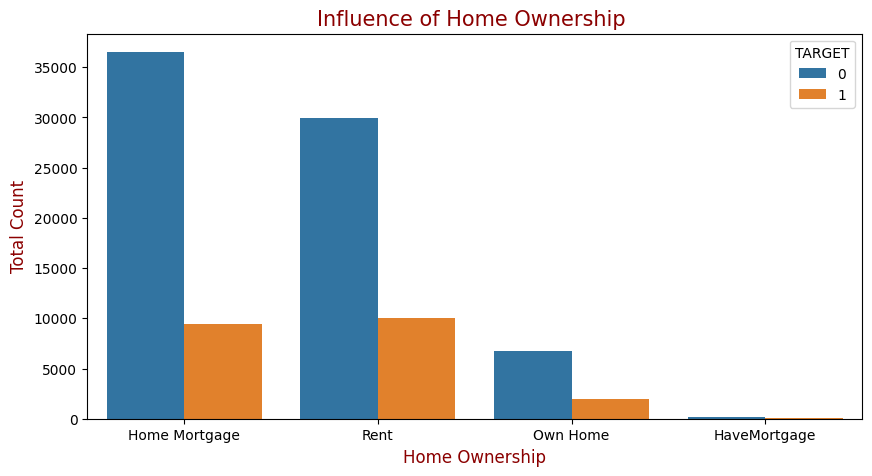

C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\2449626287.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Home Ownership', y='TARGET', data=train, palette='Set3')


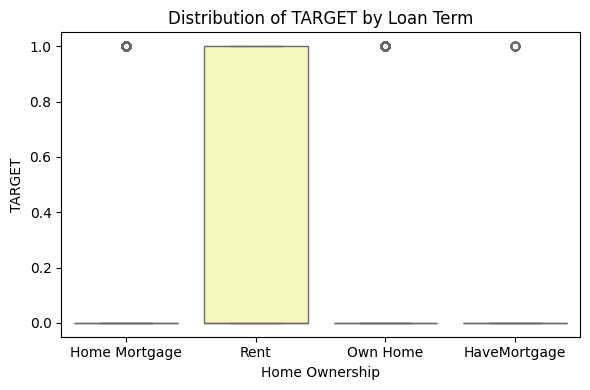

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(x='Home Ownership', y='TARGET', data=train, estimator='mean', errorbar=None, palette='Set2')
plt.title('Average TARGET by Loan Term')
plt.ylabel('Mean of TARGET')
plt.xlabel('Home Ownership')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x = "Home Ownership", hue = 'TARGET', data = train)
plt.title('Influence of Home Ownership ', title_font)
plt.xlabel("Home Ownership", label_font) #Set x axis label
plt.ylabel("Total Count", label_font) #Set y axis label
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x='Home Ownership', y='TARGET', data=train, palette='Set3')
plt.title('Distribution of TARGET by Loan Term')
plt.ylabel('TARGET')
plt.xlabel('Home Ownership')
plt.tight_layout()
plt.show()

C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\1237947010.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Purpose', y='TARGET', data=train, estimator='mean', errorbar=None, palette='Set2')


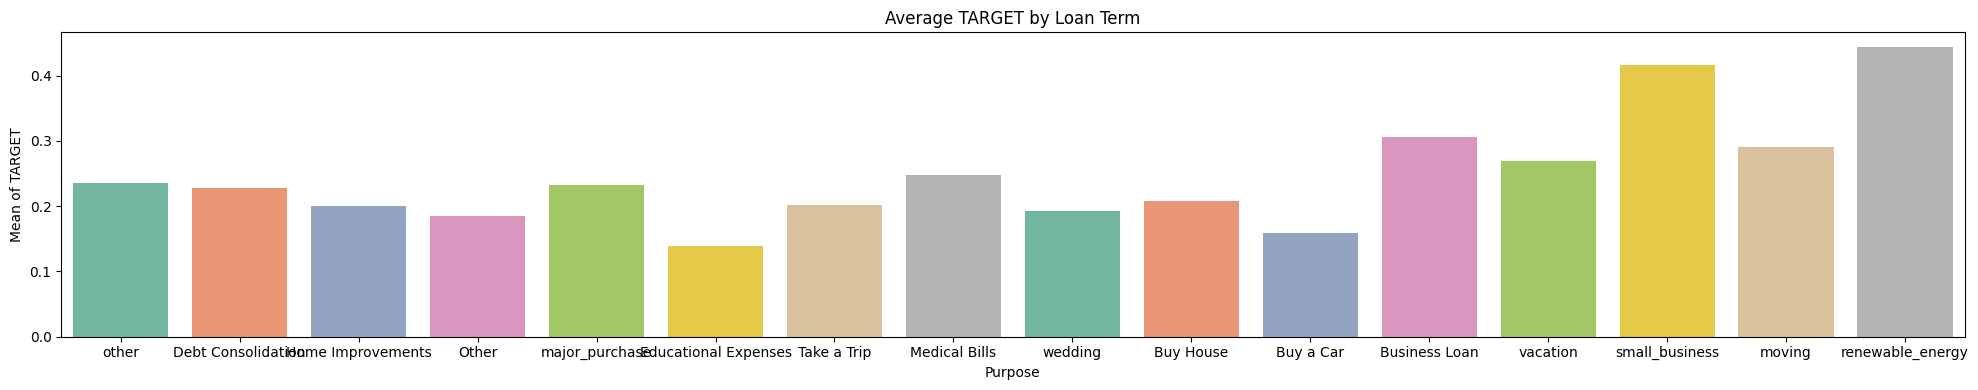

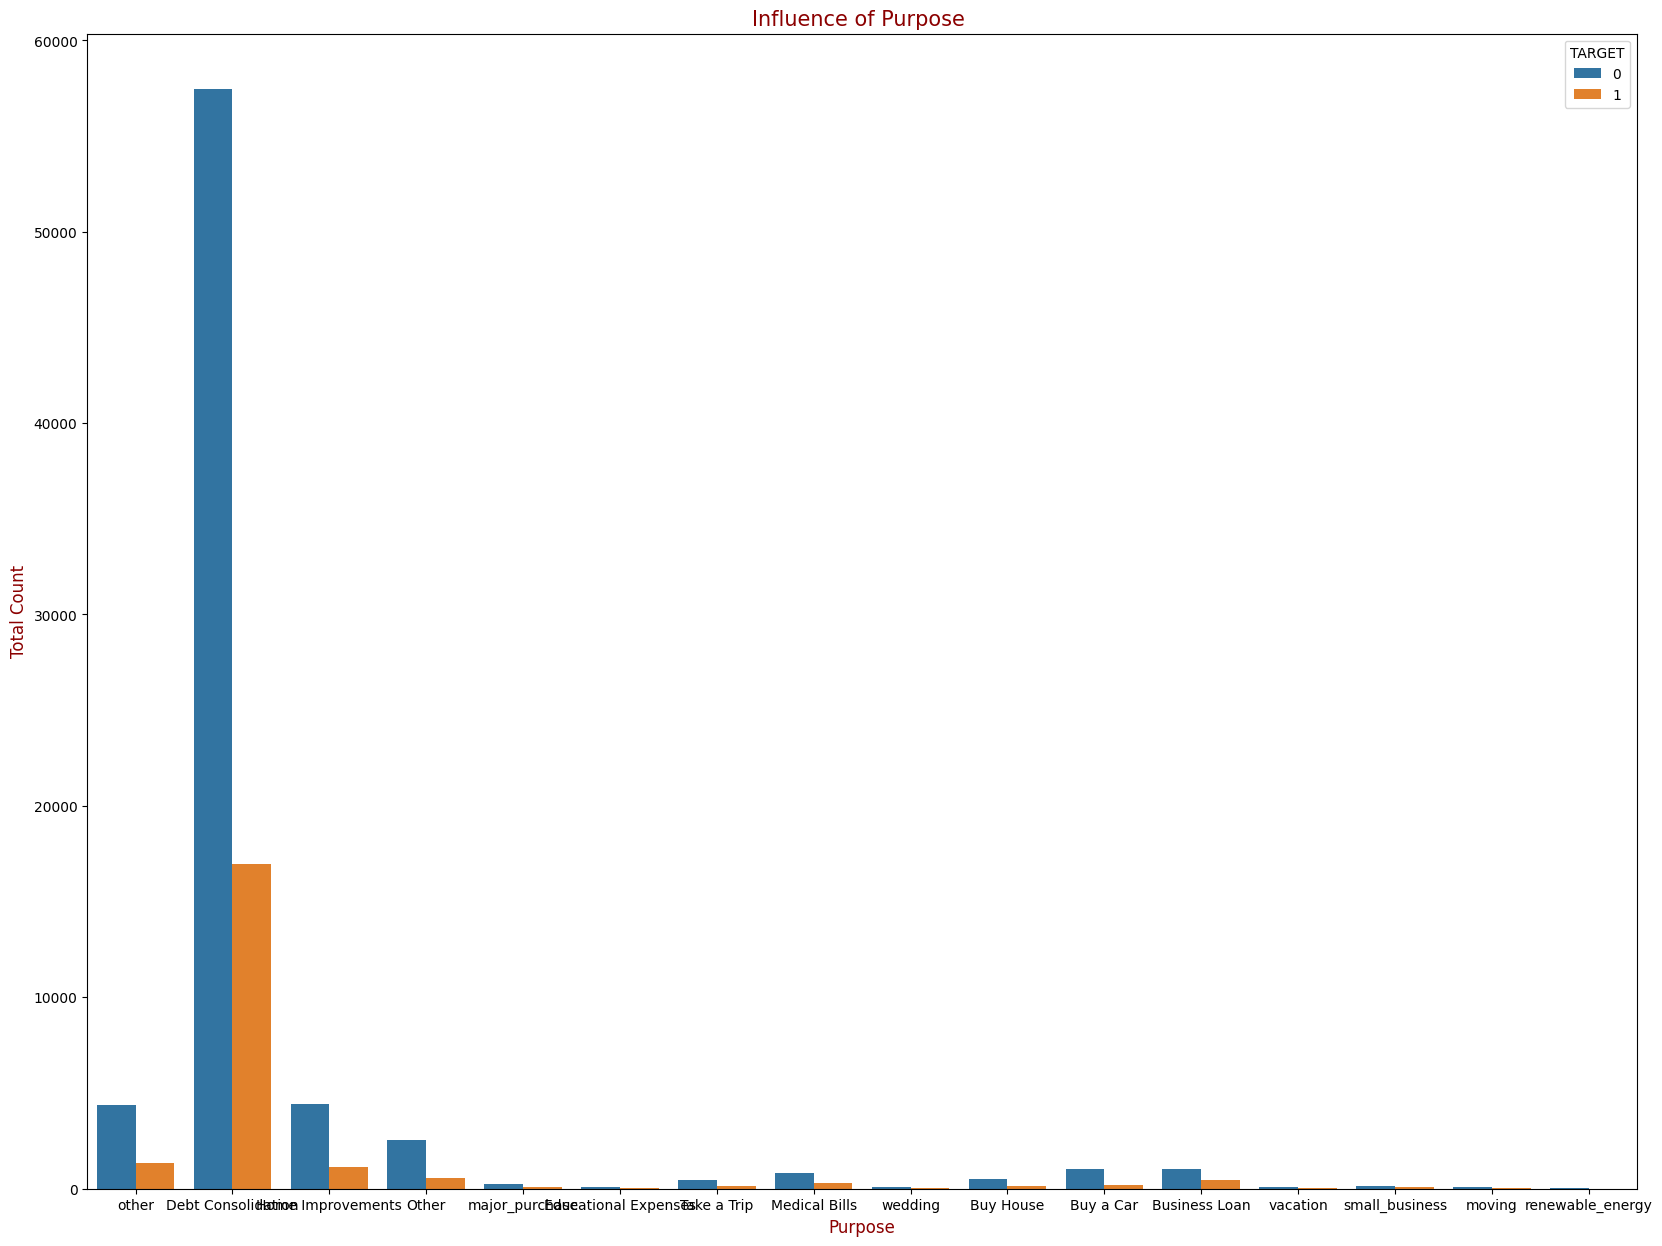

C:\Users\easntop\AppData\Local\Temp\ipykernel_13880\1237947010.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purpose', y='TARGET', data=train, palette='Set3')


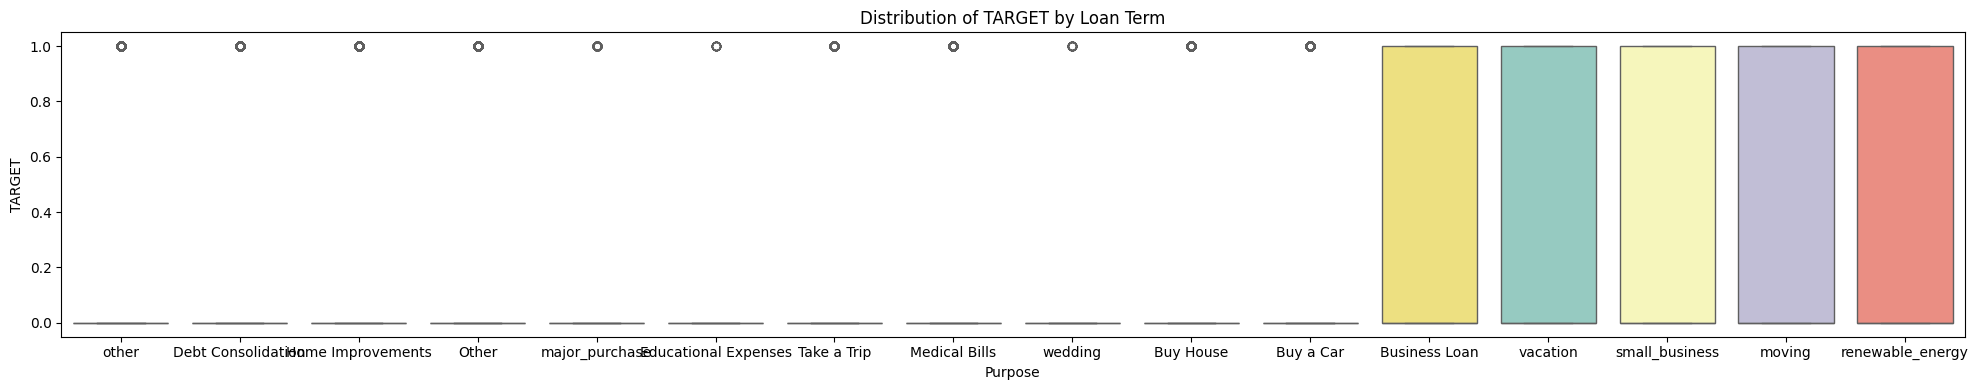

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))
sns.barplot(x='Purpose', y='TARGET', data=train, estimator='mean', errorbar=None, palette='Set2')
plt.title('Average TARGET by Loan Term')
plt.ylabel('Mean of TARGET')
plt.xlabel('Purpose')
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 15))
sns.countplot(x = "Purpose", hue = 'TARGET', data = train)
plt.title('Influence of Purpose ', title_font)
plt.xlabel("Purpose", label_font) #Set x axis label
plt.ylabel("Total Count", label_font) #Set y axis label
plt.show()

plt.figure(figsize=(20, 4))
sns.boxplot(x='Purpose', y='TARGET', data=train, palette='Set3')
plt.title('Distribution of TARGET by Loan Term')
plt.ylabel('TARGET')
plt.xlabel('Purpose')
plt.tight_layout()
plt.show()

Clip (limit) the data in the column between these two values:
* Any values below q1 are set to q1, and
* Any values above q99 are set to q99.   

In [62]:
for col in ['Credit Score', 'Annual Income']:
    q1 = np.percentile(train[col], 1)
    q99 = np.percentile(train[col], 99)
    train[col] = np.clip(train[col], q1, q99) 


One Hot Encoding

In [63]:
# Select the categorical columns
categorical_cols = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# One-hot encode the categorical columns (only those columns, not the full DataFrame)
categorical_encoded = pd.get_dummies(train[categorical_cols], drop_first=False, dtype=int)

# Drop the original categorical columns from the DataFrame
train.drop(columns=categorical_cols, inplace=True)

# Concatenate the encoded columns back to the original DataFrame
train = pd.concat([train, categorical_encoded], axis=1)


Import to excel

In [1]:
# Export to Excel
train.to_excel('trainnotsampled.xlsx', index=False)

print("notsampled training data saved as 'train_notsampled.xlsx'.")


notsampled training data saved as 'train_notsampled.xlsx'.


In [ ]:
# train.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,TARGET,credit_score_missing,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,101332,713.0,3111440.0,39152.16,11.2,6,0,174895,328768.0,0.0,0.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,224532,600.0,1174238.0,13751.06,17.7,10,0,22268,314336.0,0.0,0.0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,452892,750.0,2700736.0,20953.20,13.0,11,0,292980,764060.0,0.0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,46332,600.0,1174238.0,18021.69,33.4,16,0,496014,641740.0,0.0,0.0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,185328,723.0,914546.0,12575.15,11.7,8,0,29108,200640.0,0.0,0.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
